# CIFAR10 딥러닝 모델
* 32X32 픽셀의 60000개 컬러이미지가 포함됨
* 각 이미지는 10개의 클래스로 라벨링
* MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋

## 데이터 로드 및 전처리

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

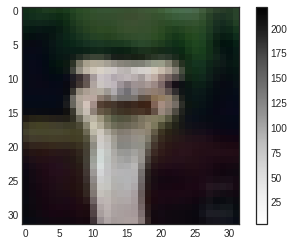

[2]


In [5]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

idx = y_train[0]
print(idx)

In [6]:
# 데이터 플랫화
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [8]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

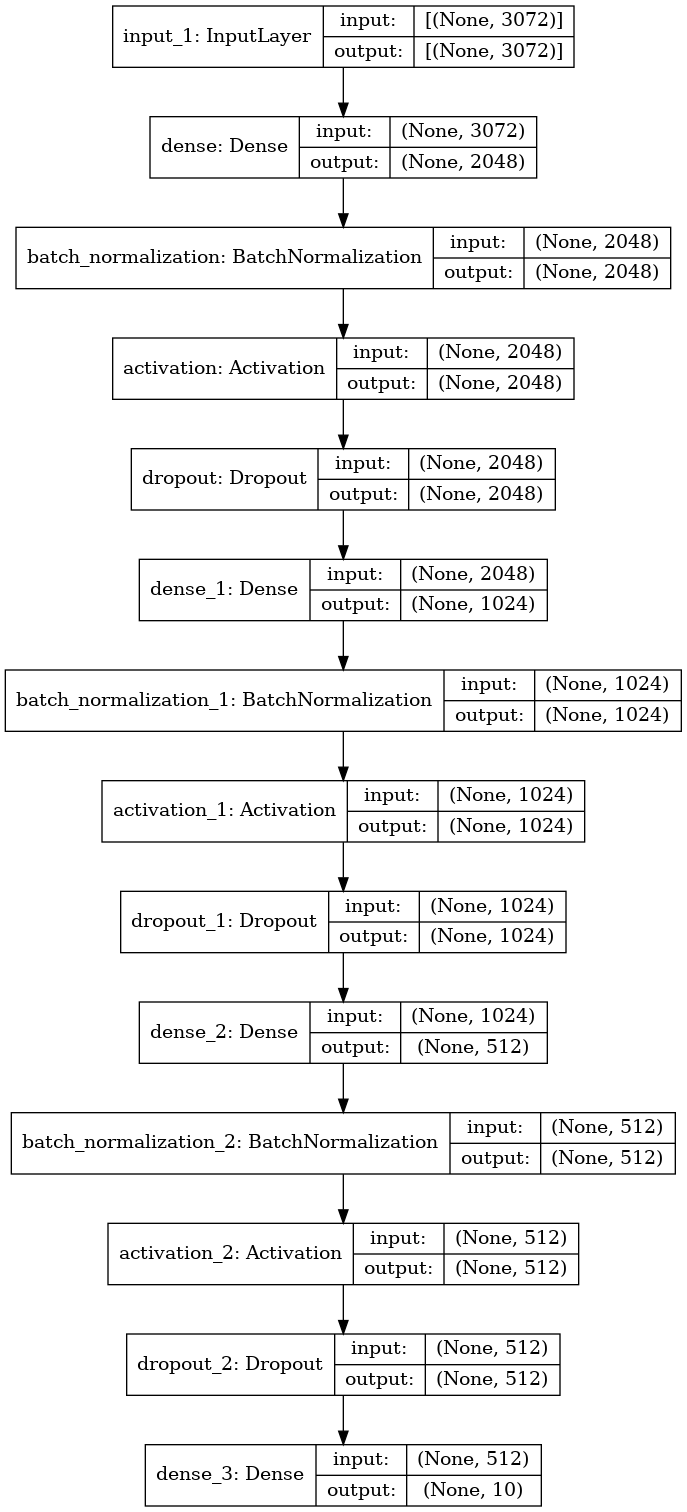

In [10]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

## 모델 학습

In [11]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=50, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=500, 
                    batch_size=500,
                    validation_data=(x_val, y_val), 
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/500
80/80 [==============================] - 3s 17ms/step - loss: 1.8834 - accuracy: 0.3430 - val_loss: 2.5634 - val_accuracy: 0.2484
Epoch 2/500
80/80 [==============================] - 1s 11ms/step - loss: 1.5884 - accuracy: 0.4338 - val_loss: 2.0138 - val_accuracy: 0.3337
Epoch 3/500
80/80 [==============================] - 1s 10ms/step - loss: 1.4607 - accuracy: 0.4805 - val_loss: 1.8858 - val_accuracy: 0.3282
Epoch 4/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3702 - accuracy: 0.5079 - val_loss: 1.8450 - val_accuracy: 0.3592
Epoch 5/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3080 - accuracy: 0.5339 - val_loss: 1.7969 - val_accuracy: 0.3612
Epoch 6/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2514 - accuracy: 0.5534 - val_loss: 1.7007 - val_accuracy: 0.3881
Epoch 7/500
80/80 [==============================] - 1s 11ms/step - loss: 1.1908 - accuracy: 0.5731 - val_loss: 1.6946 - val_accuracy: 0.3978
Epoch 

80/80 [==============================] - 1s 11ms/step - loss: 0.1766 - accuracy: 0.9365 - val_loss: 2.5975 - val_accuracy: 0.4921
Epoch 59/500
80/80 [==============================] - 1s 11ms/step - loss: 0.1681 - accuracy: 0.9414 - val_loss: 2.5798 - val_accuracy: 0.4817


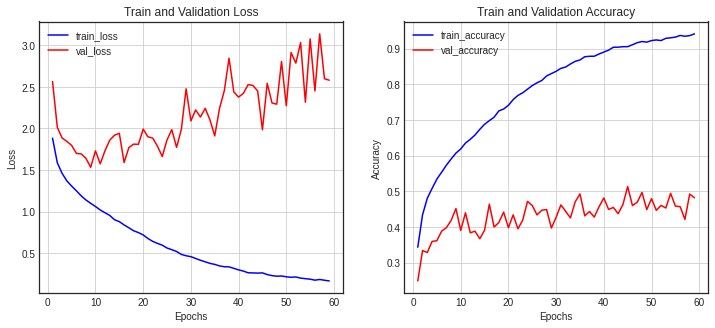

In [12]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5297 - accuracy: 0.4631


[1.5297133922576904, 0.46309998631477356]

## 번외편
CNN으로 해보면 어떨까

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2)

In [3]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [4]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [8]:
model2 = models.Sequential()
model2.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPool2D(2, 2))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       1179904   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [ ]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model2.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

history = model2.fit(x_train, y_train, epochs=20, 
                    batch_size=500,
                    validation_data=(x_val, y_val), 
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
80/80 [==============================] - 19s 168ms/step - loss: 1.5244 - accuracy: 0.4650 - val_loss: 2.0636 - val_accuracy: 0.5028
Epoch 2/20
80/80 [==============================] - 13s 164ms/step - loss: 1.0654 - accuracy: 0.6244 - val_loss: 1.8598 - val_accuracy: 0.5679
Epoch 3/20
80/80 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.6890